In [100]:
import pandas as pd
import numpy as np

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [129]:
# Load the dataset
data = pd.read_csv('Battery_dataset.csv')
data

,Time,Voltage,Current,Temperature,Capacity,WhAccu
0,00:01.9,4.17402,-1.20553,23.87099,0.00000,0.00000
1,00:02.0,4.16559,-1.08549,23.87099,-0.00003,-0.00013
2,00:02.1,4.16256,-1.05228,23.87099,-0.00006,-0.00026
3,00:02.2,4.16155,-1.04462,23.87099,-0.00009,-0.00038
4,00:02.3,4.16104,-1.04207,23.87099,-0.00012,-0.00050
...,...,...,...,...,...,...
85910,09:59.7,3.21554,0.00000,23.87099,-2.55821,-9.18608
85911,09:59.8,3.21554,0.00000,23.87099,-2.55821,-9.18608
85912,09:59.9,3.21554,0.00000,23.87099,-2.55821,-9.18608
85913,10:00.0,3.21554,0.00000,23.87099,-2.55821,-9.18608


In [128]:
data1 = data.head(1200)
data1

,Time,Voltage,Current,Temperature,Capacity,WhAccu
0,00:01.9,4.17402,-1.20553,23.87099,0.00000,0.00000
1,00:02.0,4.16559,-1.08549,23.87099,-0.00003,-0.00013
2,00:02.1,4.16256,-1.05228,23.87099,-0.00006,-0.00026
3,00:02.2,4.16155,-1.04462,23.87099,-0.00009,-0.00038
4,00:02.3,4.16104,-1.04207,23.87099,-0.00012,-0.00050
...,...,...,...,...,...,...
1195,02:01.4,4.04238,-3.53486,23.87099,-0.03913,-0.15592
1196,02:01.5,4.04254,-3.53486,23.87099,-0.03922,-0.15632
1197,02:01.6,4.04271,-3.53486,23.87099,-0.03932,-0.15671
1198,02:01.7,4.04288,-3.53486,23.87099,-0.03942,-0.15711


In [103]:
# Preprocess the dataset by cleaning and filtering the data
data1 = data1.dropna()  # Remove rows with missing data
data1 = data1[data1['Current'] != 0]  # Remove rows with zero current

In [104]:
# Calculate the SOC using the Coulomb counting method
dt = 1
N = len(data1['Voltage'])
SOC = np.zeros(N)
SOC[0] = 1.0 # initial state of charge
Q = 3600 # battery capacity in Coulombs
IR = 0.5 
for i in range(1, N):
    dt = 1 # time difference assumed to be 1 second
    coulombs = (data['Current'][i] + data['Current'][i-1])/2*dt/Q # average current
    SOC[i] = SOC[i-1] - coulombs + IR*data['Current'][i]/Q    

In [105]:
# Print the estimated SOC
SOC
import pandas as pd
df_soc  = pd.DataFrame({'SOC':SOC})
print(df_soc)

           SOC
0     1.000000
1     1.000167
2     1.000318
3     1.000464
4     1.000609
...        ...
1195  1.194475
1196  1.194966
1197  1.195457
1198  1.195948
1199  1.196439

[1200 rows x 1 columns]


In [106]:
# Split the dataset into training and testing sets
X = data1[['Voltage', 'Current']]
y = df_soc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/Users/krishvenigalla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [108]:
# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print('Model score:', score)

Model score: 0.08196374990371513


In [109]:
# Train an AI model on the training set to estimate the SOC
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# Evaluate the model on the testing set to measure its accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.31


In [111]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Train the SVM model
model = SVR(kernel='rbf', gamma='auto')
model.fit(X_train_scaled, y_train)

/Users/krishvenigalla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(gamma='auto')

In [113]:
# Predict the SOC for test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.04485448446759421


In [114]:
# Create an SVR model with a non-linear kernel
model = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [115]:
# Train the model on the training set
model.fit(X_train, y_train)

/Users/krishvenigalla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000.0, gamma=0.1)

In [116]:
# Evaluate the model on the testing set to measure its accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: -0.21


In [117]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=5)

In [118]:
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.00


In [119]:
# Evaluate the model on the testing set to measure its accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.55


In [120]:
# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=5)

In [122]:
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set to measure its accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.62


/var/folders/2_/1pn1h9kx6tzdrrfl93q6d12r0000gn/T/ipykernel_2652/2981702125.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [47]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.00


In [79]:
# Use the model to predict the SOC of a new battery
new_data = np.array([[2.5, 3.7]])
soc_pred = model.predict(new_data)
print('Predicted SOC:', soc_pred)

Predicted SOC: [1.09821954]


/var/folders/2_/1pn1h9kx6tzdrrfl93q6d12r0000gn/T/ipykernel_2652/448816793.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model accuracy: 0.62


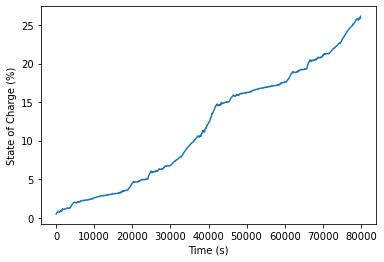

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('Battery_dataset.csv')
data1 = data.head(1200)
data1

dt = 1
N = len(data1['Voltage'])
SOC = np.zeros(N)
Q = 3600 # battery capacity in Coulombs
IR = 0.5

# Preprocess the dataset by cleaning and filtering the data
data = data.dropna()  # Remove rows with missing data
data = data[data['Current'] != 0]  # Remove rows with zero current

# Use AI techniques to estimate the SOC
model = RandomForestRegressor(n_estimators=100, max_depth=5)

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set to measure its accuracy
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

# Use the Coulomb counting method to find the SOC value in the dataset
initial_soc = 0.5
data['delta_time'] = dt
data['delta_charge'] = data['Current'] * data['delta_time'] / 3600
data['soc_cc'] = initial_soc - data['delta_charge'].cumsum()

# Plot the output SOC values with time
plt.plot(data['soc_cc'])
plt.xlabel('Time (s)')
plt.ylabel('State of Charge (%)')
plt.show()